# Task 4 : Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df_train=pd.read_csv('twitter_training.csv')
df_train.head(10)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


In [3]:
df_valid=pd.read_csv('twitter_validation.csv')
df_valid.head(10)

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
5,7925,MaddenNFL,Positive,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...
6,11332,TomClancysRainbowSix,Positive,"Rocket League, Sea of Thieves or Rainbow Six: ..."
7,1107,AssassinsCreed,Positive,my ass still knee-deep in Assassins Creed Odys...
8,2069,CallOfDuty,Negative,FIX IT JESUS ! Please FIX IT ! What In the wor...
9,3185,Dota2,Positive,The professional dota 2 scene is fucking explo...


In [12]:
# Naming each column
column_name=['TweetID','Entity','Sentiment','Text']
df_train.columns=column_name
df_valid.columns=column_name

In [14]:
df_valid.head(10)
df_valid.shape

(999, 4)

In [15]:
df_train.head(10)
df_train.shape

(74681, 4)

In [19]:
#concat two data frame
df=pd.concat([df_train,df_valid],ignore_index=False)
df.head(5)


,TweetID,Entity,Sentiment,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [20]:
df.shape

(75680, 4)

In [32]:
df.describe()

,TweetID
count,74994.000000
mean,6430.397965
std,3737.514825
min,1.000000
25%,3195.000000
50%,6419.000000
75%,9596.000000
max,13200.000000


In [25]:
df.isnull().sum()

TweetID        0
Entity         0
Sentiment      0
Text         686
dtype: int64

In [26]:
df.duplicated().sum()

3216

In [37]:
#Before remove
df_duplicated = df.duplicated().sum()
print(f"There are {df_duplicated} duplicate values in the dataset")

There are 2856 duplicate values in the dataset


In [38]:
#After remove
df = df.drop_duplicates()
df_remove_duplicated = df.duplicated().sum()
print(f"There are {df_remove_duplicated} duplicate values in the dataset")

There are 0 duplicate values in the dataset


In [30]:
df=df.dropna()

In [31]:
df.isnull().sum()

TweetID      0
Entity       0
Sentiment    0
Text         0
dtype: int64

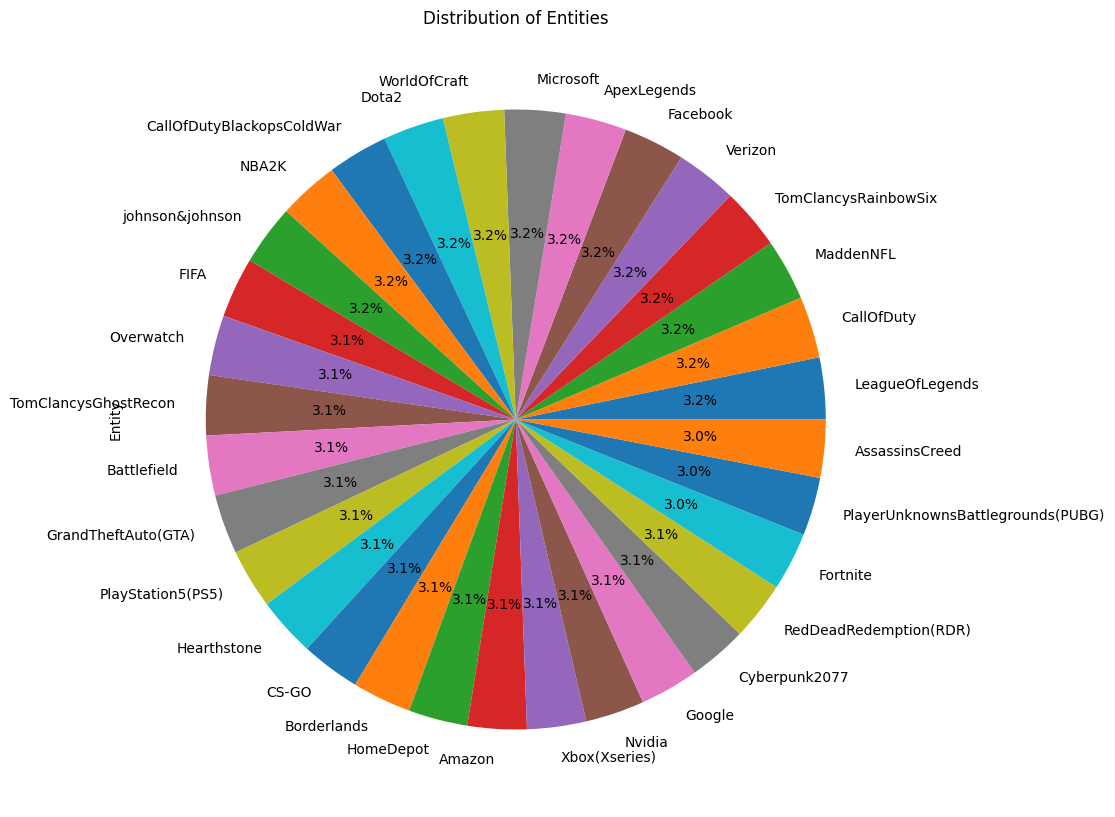

In [33]:
entity_content=df['Entity'].value_counts()
entity_content.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 12))
plt.title('Distribution of Entities')
plt.show()

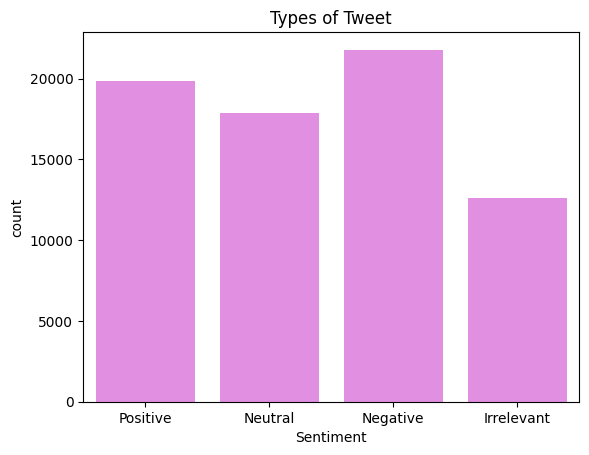

In [56]:
sns.countplot(x='Sentiment', data=df, color='violet').set(title='Types of Tweet')

plt.show()

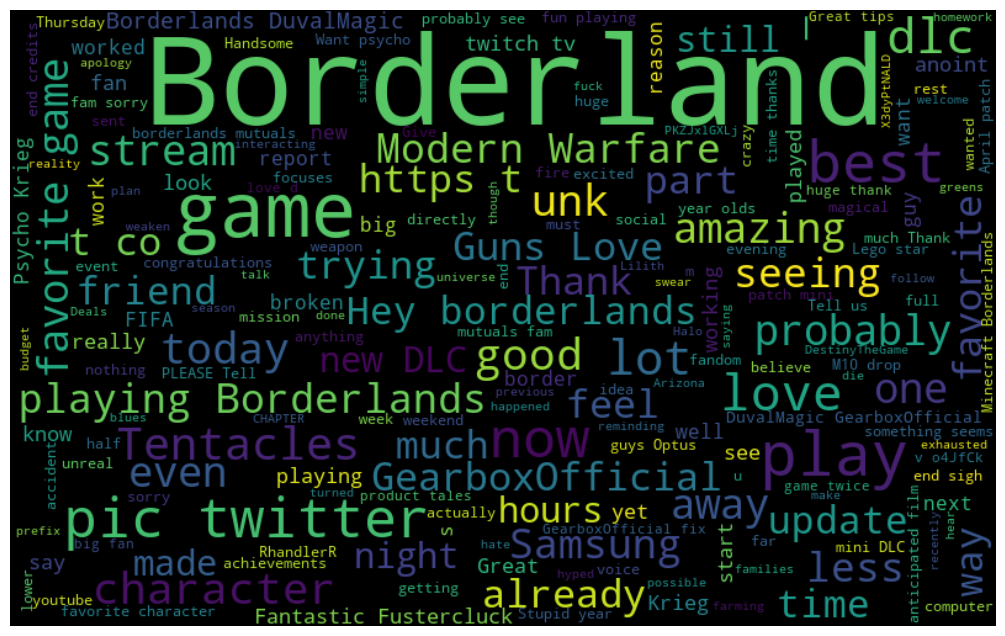

In [47]:
all_words = " ".join([sentence for sentence in df['Text'][200:550]])

# Generate the Word Cloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# Display the Word Cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()

<Axes: xlabel='Sentiment', ylabel='Entity'>

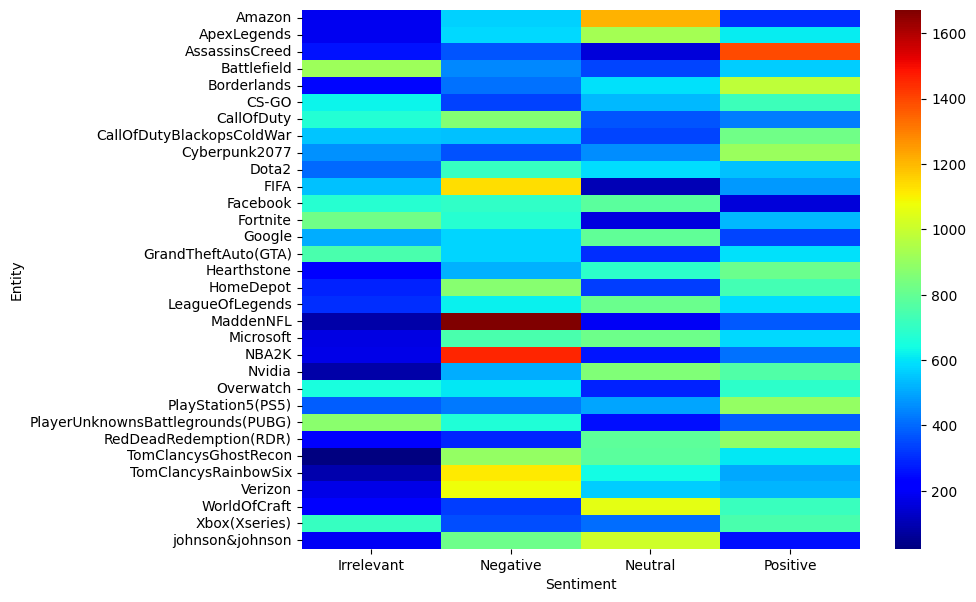

In [60]:
plt.figure(figsize=(9,7))
crosstab = pd.crosstab(index=df['Entity'], columns=df['Sentiment'])
sns.heatmap(crosstab, cmap = 'jet')

In [81]:
crosstab.head

<bound method NDFrame.head of Sentiment                          Irrelevant  Negative  Neutral  Positive
Entity                                                                    
Amazon                                    188       566     1210       306
ApexLegends                               188       577      927       613
AssassinsCreed                            257       366      155      1393
Battlefield                               912       449      345       563
Borderlands                               239       415      590       977
CS-GO                                     624       335      530       721
CallOfDuty                                668       865      370       430
CallOfDutyBlackopsColdWar                 548       542      343       823
Cyberpunk2077                             462       361      458       908
Dota2                                     401       709      586       544
FIFA                                      544      1131      103      

C:\Users\vivek\AppData\Local\Temp\ipykernel_6948\2005320207.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ms_data, x='Sentiment', palette='viridis')


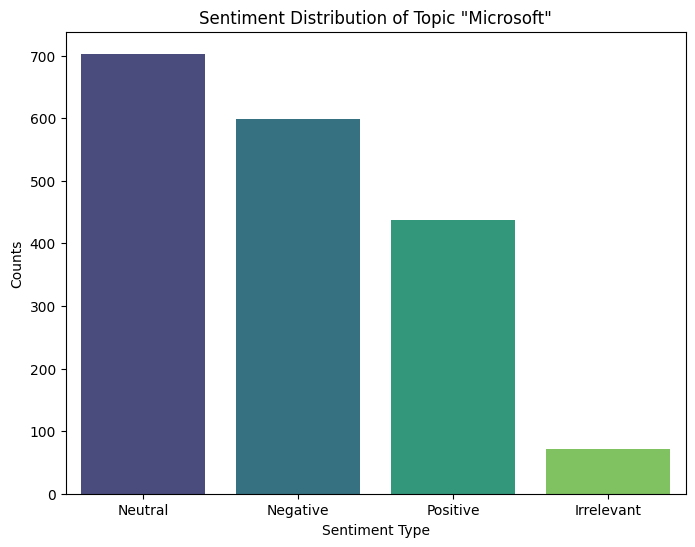

In [71]:
ms_data = df[df['Text'].str.contains('Microsoft', case=False)]

plt.figure(figsize=(8, 6))
sns.countplot(data=ms_data, x='Sentiment', palette='viridis')
plt.title('Sentiment Distribution of Topic "Microsoft"')
plt.xlabel('Sentiment Type')
plt.ylabel('Counts')
plt.show()

C:\Users\vivek\AppData\Local\Temp\ipykernel_6948\2433680209.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ms_data, x='Sentiment', palette='viridis')


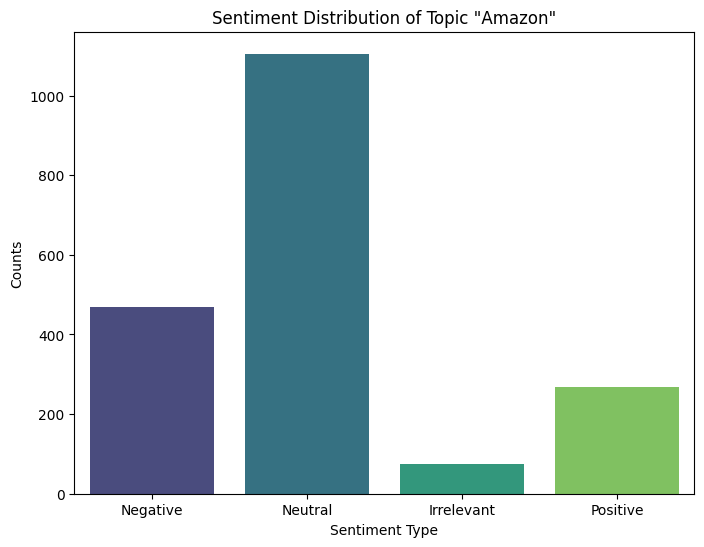

In [72]:
ms_data = df[df['Text'].str.contains('Amazon', case=False)]

plt.figure(figsize=(8, 6))
sns.countplot(data=ms_data, x='Sentiment', palette='viridis')
plt.title('Sentiment Distribution of Topic "Amazon"')
plt.xlabel('Sentiment Type')
plt.ylabel('Counts')
plt.show()

C:\Users\vivek\AppData\Local\Temp\ipykernel_6948\1787133628.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ms_data, x='Sentiment', palette='viridis')


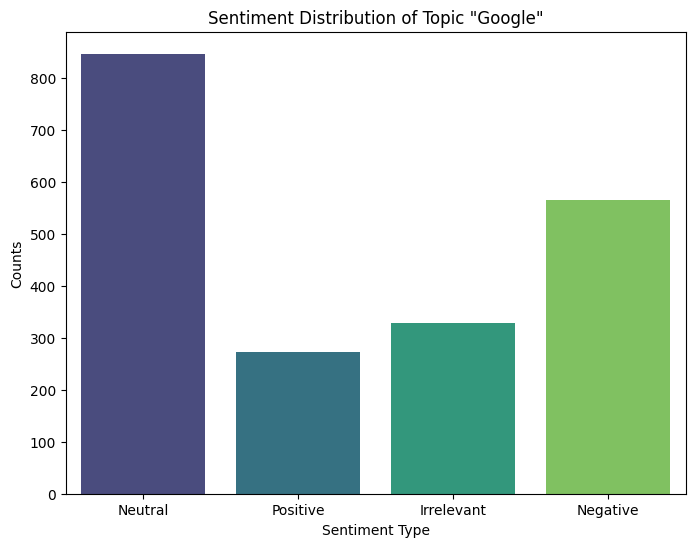

In [78]:
ms_data = df[df['Text'].str.contains('Google', case=False)]

plt.figure(figsize=(8, 6))
sns.countplot(data=ms_data, x='Sentiment', palette='viridis')
plt.title('Sentiment Distribution of Topic "Google"')
plt.xlabel('Sentiment Type')
plt.ylabel('Counts')
plt.show()

C:\Users\vivek\AppData\Local\Temp\ipykernel_6948\211292228.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ms_data, x='Sentiment', palette='viridis')


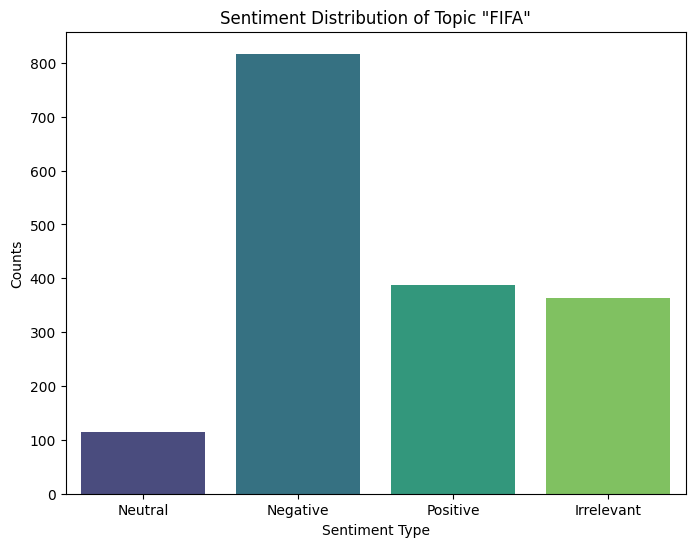

In [84]:

ms_data = df[df['Text'].str.contains('FIFA', case=False)]

plt.figure(figsize=(8, 6))
sns.countplot(data=ms_data, x='Sentiment', palette='viridis')
plt.title('Sentiment Distribution of Topic "FIFA"')
plt.xlabel('Sentiment Type')
plt.ylabel('Counts')
plt.show()

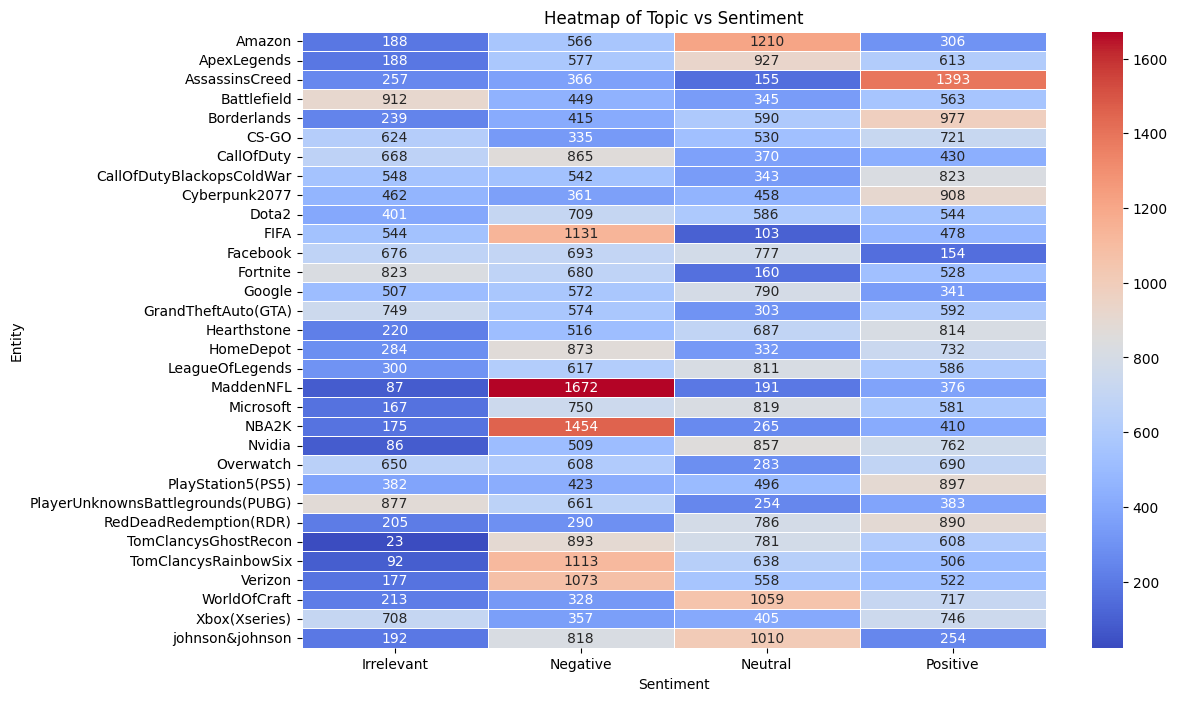

In [77]:
# Create the crosstab
crosstab = pd.crosstab(index=df['Entity'], columns=df['Sentiment'])

# Plot the heatmap
plt.figure(figsize=(12, 8))  
sns.heatmap(crosstab, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)

# Add labels and title
plt.title('Heatmap of Topic vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Entity')

# Show the plot
plt.show()
